In [1]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

In [2]:
boston_data = load_boston()

c:\Users\Sushree S Swain\Downloads\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np

        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing 

In [3]:
df = pd.DataFrame(boston_data.data, columns=boston_data.feature_names)

In [4]:
df['MEDV'] = boston_data.target

In [5]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [6]:
from sklearn.preprocessing import StandardScaler

X = boston_data.data  
y = boston_data.target  

scaler = StandardScaler()
X = scaler.fit_transform(X)

X = np.c_[np.ones(X.shape[0]), X]

learning_rate = 0.01
num_iterations = 1000

theta = np.zeros(X.shape[1])

for iteration in range(num_iterations):
    predictions = np.dot(X, theta)
    
    error = predictions - y
    
    gradient = (1 / len(X)) * np.dot(X.T, error)
    
    theta -= learning_rate * gradient

print("Learned Parameters (Theta):", theta)


Learned Parameters (Theta): [22.53183355 -0.78102837  0.81194215 -0.27316748  0.74256629 -1.57697862
  2.88943522 -0.10349181 -2.74240875  1.45982586 -0.88309816 -1.95217556
  0.87224133 -3.64278025]


In [7]:
predictions = np.dot(X, theta)
mse = np.mean((predictions - y) ** 2)
print("Mean Squared Error (MSE):", mse)

Mean Squared Error (MSE): 22.164447166286674


In [8]:
X = boston_data.data  
y = boston_data.target  

scaler = StandardScaler()
X = scaler.fit_transform(X)

X = np.c_[np.ones(X.shape[0]), X]

learning_rate = 0.01
num_epochs = 1000

theta = np.zeros(X.shape[1])

for epoch in range(num_epochs):
    for i in range(X.shape[0]):
        
        random_index = np.random.randint(X.shape[0])
        xi = X[random_index:random_index+1]
        yi = y[random_index:random_index+1]
        
        prediction = np.dot(xi, theta)

        error = prediction - yi
        
        gradient = xi.T.dot(error)
        theta -= learning_rate * gradient

print("Learned Parameters (Theta):", theta)


Learned Parameters (Theta): [22.07032475 -1.4326097   1.52990383  0.54245914  0.319959   -1.90882204
  3.02365983  0.11323072 -2.73200389  2.41549418 -2.67754828 -2.41178991
  1.24014403 -3.48292665]


In [9]:
boston = load_boston()
data = pd.DataFrame(data=boston.data, columns=boston.feature_names)
data['PRICE'] = boston.target


c:\Users\Sushree S Swain\Downloads\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np

        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing 

In [10]:
X = data.drop('PRICE', axis=1)  
y = data['PRICE']  


In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [12]:
model = LinearRegression()


In [13]:
model.fit(X_train, y_train)


LinearRegression()

In [14]:
y_pred = model.predict(X_test)


In [15]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error (MSE):", mse)
print("R-squared (R2) Score:", r2)


Mean Squared Error (MSE): 24.291119474973478
R-squared (R2) Score: 0.6687594935356326


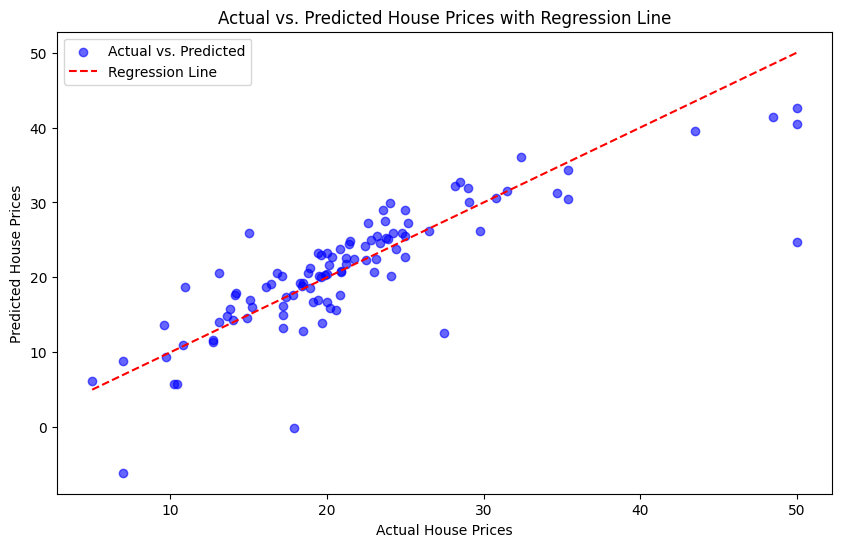

In [16]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.6, color='b', label='Actual vs. Predicted')

x_range = np.linspace(min(y_test), max(y_test), 100)
plt.plot(x_range, x_range, color='r', linestyle='--', label='Regression Line')

plt.xlabel("Actual House Prices")
plt.ylabel("Predicted House Prices")
plt.title("Actual vs. Predicted House Prices with Regression Line")
plt.legend()
plt.show()



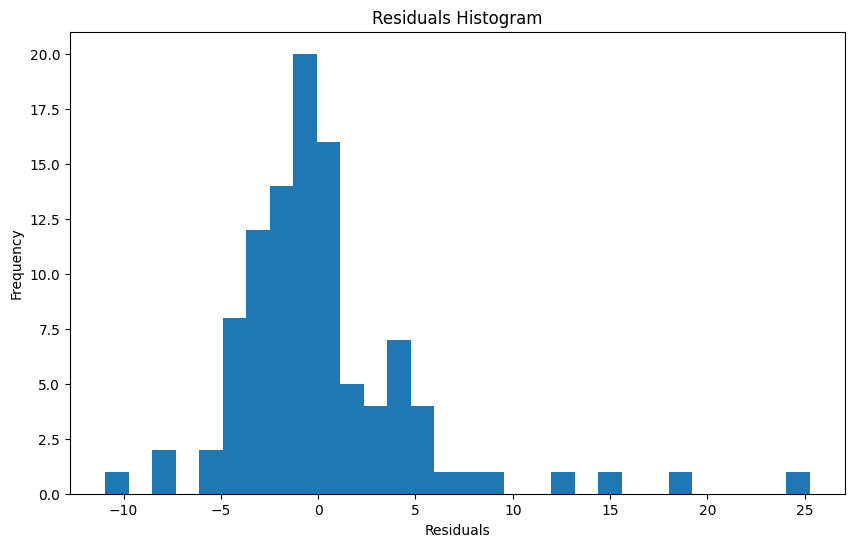

In [17]:
plt.figure(figsize=(10, 6))
residuals = y_test - y_pred
plt.hist(residuals, bins=30)
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.title("Residuals Histogram")
plt.show()


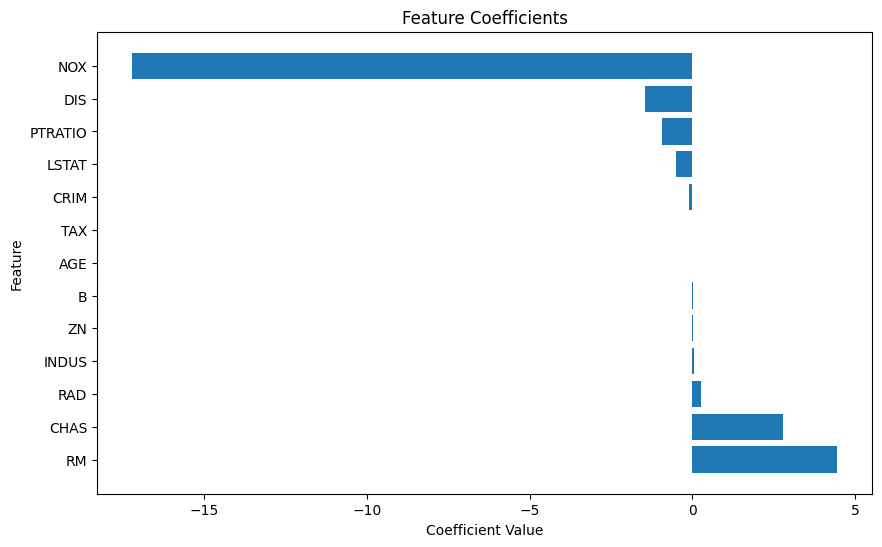

In [18]:
coefficients = pd.DataFrame({'Feature': X.columns, 'Coefficient': model.coef_})
coefficients = coefficients.sort_values(by='Coefficient', ascending=False)

plt.figure(figsize=(10, 6))
plt.barh(coefficients['Feature'], coefficients['Coefficient'])
plt.xlabel("Coefficient Value")
plt.ylabel("Feature")
plt.title("Feature Coefficients")
plt.show()


In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split

In [20]:
boston = load_boston()
data = pd.DataFrame(boston.data, columns=boston.feature_names)
target = pd.DataFrame(boston.target, columns=["MEDV"])

# Add a bias term (intercept) to the features
data['bias'] = 1

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.2, random_state=42)

c:\Users\Sushree S Swain\Downloads\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np

        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing 

In [21]:
# Analytical solution
theta_analytical = np.linalg.inv(X_train.T.dot(X_train)).dot(X_train.T).dot(y_train)

c:\Users\Sushree S Swain\Downloads\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np

        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing 

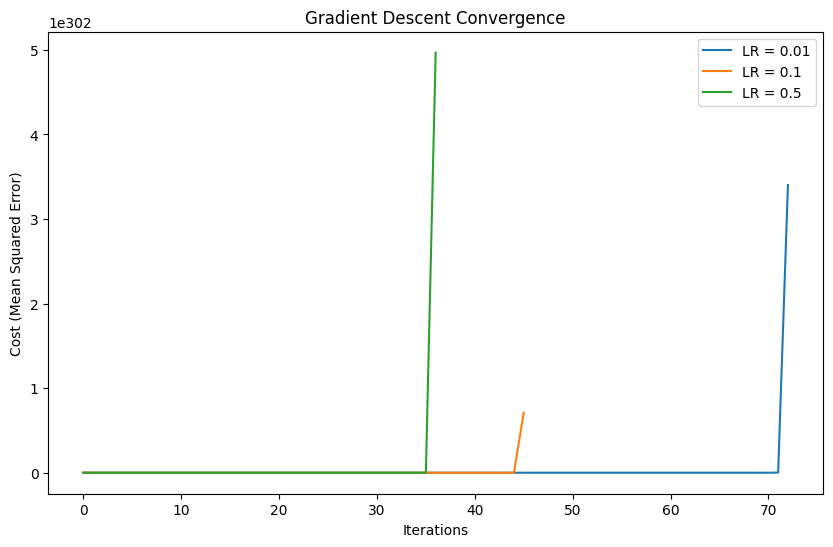

In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split

boston = load_boston()
data = pd.DataFrame(boston.data, columns=boston.feature_names)
target = pd.DataFrame(boston.target, columns=["MEDV"])

data['bias'] = 1

X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.2, random_state=42)

theta = np.random.rand(X_train.shape[1], 1)

def gradient_descent(X, y, theta, learning_rate, num_iterations):
    m = len(y)
    cost_history = []

    for i in range(num_iterations):
        gradient = (1 / m) * X.T.dot(X.dot(theta) - y)
        theta -= learning_rate / (i + 1) * gradient
        cost = (1 / (2 * m)) * np.sum((X.dot(theta) - y) ** 2)
        cost_history.append(cost)

    return theta, cost_history

learning_rates = [0.01, 0.1, 0.5]
num_iterations = 1000

theta_history = []
cost_history = []

for lr in learning_rates:
    theta = np.random.rand(X_train.shape[1], 1)  # Initialize weights randomly
    theta, cost = gradient_descent(X_train.to_numpy(), y_train.to_numpy(), theta, lr, num_iterations)
    theta_history.append(theta)
    cost_history.append(cost)

plt.figure(figsize=(10, 6))
for i in range(len(learning_rates)):
    plt.plot(range(num_iterations), cost_history[i], label=f'LR = {learning_rates[i]}')

plt.xlabel('Iterations')
plt.ylabel('Cost (Mean Squared Error)')
plt.title('Gradient Descent Convergence')
plt.legend()
plt.show()